In [6]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('Movies/users.dat', sep='::', header = None, names = unames, engine='python')

In [9]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('Movies/ratings.dat', sep ='::', header=None, names=rnames, engine='python')

In [10]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('Movies/movies.dat', sep ='::', header=None, names=mnames, engine='python')

In [11]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
data = pd.merge(pd.merge(ratings, users), movies)

In [17]:
data.sample(5)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
848887,5585,1480,4,959284749,M,25,4,10016,Smilla's Sense of Snow (1997),Action|Drama|Thriller
126397,2021,2427,3,974977551,M,25,0,61364,"Thin Red Line, The (1998)",Action|Drama|War
765404,1605,3360,3,975386598,F,18,0,28270,Hoosiers (1986),Drama
181627,3503,1247,5,969560807,M,18,4,59715,"Graduate, The (1967)",Drama|Romance
166988,3346,3451,4,967776832,M,35,7,54016,Guess Who's Coming to Dinner (1967),Comedy|Drama


In [19]:
data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [23]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [24]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [25]:
ratings_by_title = data.groupby('title').size()

In [26]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [27]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [28]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [34]:
mean_ratings = mean_ratings.loc[active_titles]

In [31]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [36]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [37]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


<h1>Measuring rating disagreement</h1>

<p>find the movies that are most divisive between male and female
viewers.</p>

In [38]:
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']

<p>Sorting by 'diff' gives us the movies with the greatest rating difference and which were
preferred by women</p>

In [39]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [40]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


<p>Reversing the order of the rows and again slicing off the top 15 rows, we get the movies
preferred by men that women</p>

In [41]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


<p>the movies that elicited the most disagreement among
viewers, independent of gender. Disagreement can be measured by the variance or
standard deviation of the ratings:</p>

In [43]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [45]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [47]:
#Order Series by value in descending order
rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

<h1>Names</h1>
<br>
<h2>US Baby Names 1880-2010</h2>

In [3]:
!head -n 10 Names/yob1880.txt

In [1]:
#loaded into a DataFrame with pandas.read_csv
import pandas as pd
names1880 = pd.read_csv('Names/yob1880.txt', names=['name','sex','births'])

In [2]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [3]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [4]:
# 2010 is the last available year right now
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'Names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [5]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [6]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [7]:
total_births.tail()

sex,F,M
year,,
2006,1899824,2053753
2007,1921053,2073784
2008,1889069,2038194
2009,1835062,1981481
2010,1775345,1916476


In [8]:
total_births.plot(title='Total births by sex and year')

In [9]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [10]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [11]:
#verifying that the prop column sums to 1 within all the groups
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [12]:
#extract a subset of the data to facilitate further analysis: the top 1000 names for each sex/year combination.
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [13]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [14]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [15]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [16]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [17]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [18]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc585d607b8>,
      dtype=object)

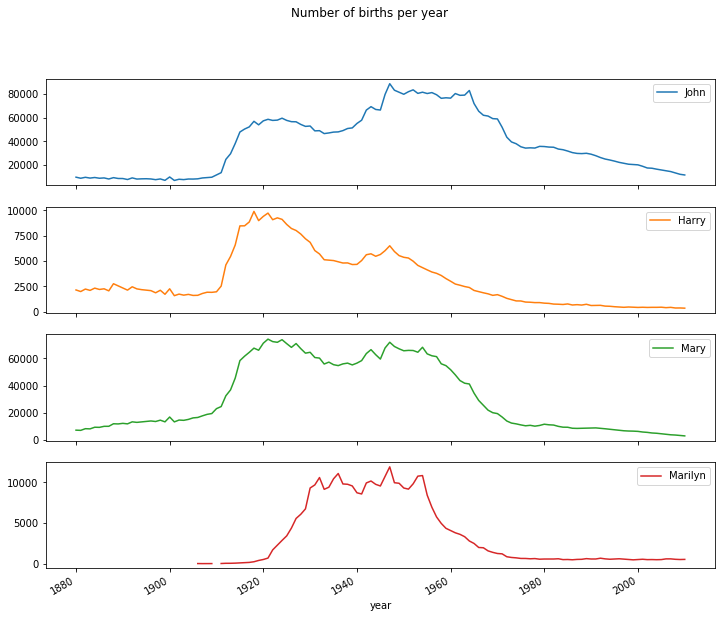

In [19]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

<h2>Measuring the increase in naming diversity</h2>

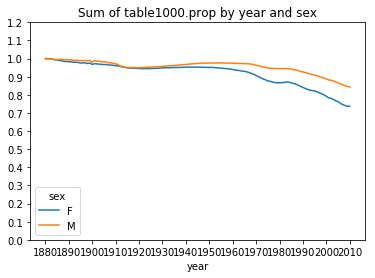

In [20]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex", 
           yticks=np.linspace(0,1.2,13), xticks=range(1880, 2020, 10))

In [21]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22127,2010,0.011546
260878,Ethan,M,18002,2010,0.009393
260879,Michael,M,17350,2010,0.009053
260880,Jayden,M,17179,2010,0.008964
260881,William,M,17051,2010,0.008897
260882,Alexander,M,16756,2010,0.008743
260883,Noah,M,16451,2010,0.008584
260884,Daniel,M,15843,2010,0.008267
260885,Aiden,M,15538,2010,0.008108
260886,Anthony,M,15493,2010,0.008084


<p>we want to know how many of the most popular names it takes to reach 50%.</p>
<br>
<p>Taking the cumulative sum, cumsum , of prop then calling
the method searchsorted returns the position in the cumulative sum at which 0.5 would
need to be inserted to keep it in sorted order:</p>

In [22]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [23]:
prop_cumsum[:10]

260877    0.011546
260878    0.020939
260879    0.029992
260880    0.038956
260881    0.047853
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [24]:
prop_cumsum.searchsorted(0.5)

array([116])

<p>Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By con-
trast, in 1900 this number was much smaller:</p>

In [25]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1

array([25])

<p>It should now be fairly straightforward to apply this operation to each year/sex com-
bination; groupby those fields and apply a function returning the count for each group:</p>

In [26]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(0.5)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [27]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [28]:
diversity = diversity.astype(float)

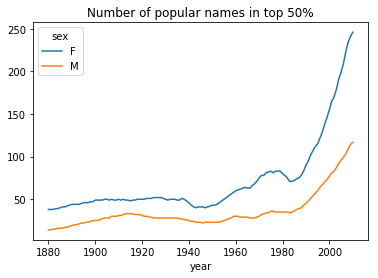

In [29]:
diversity.plot(title="Number of popular names in top 50%")

<p>the distribution of boy names by final letter has
changed significantly over the last 100 years.</p>
<br>
<p>To see this, I first aggregate all of the births
in the full data set by year, sex, and final letter:</p>

In [32]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [33]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                 NaN     694.0     455.0    411.0    3912.0   39276.0
c                 5.0      49.0     956.0    482.0   15454.0   23348.0
d              6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e            133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [34]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [35]:
letter_prop = subtable / subtable.sum().astype(float)

In [36]:
import matplotlib.pyplot as plt

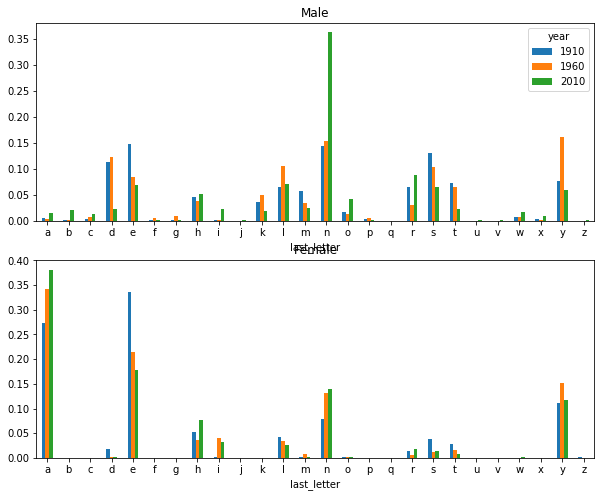

In [37]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind = 'bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind = 'bar', rot=0, ax=axes[1], title='Female', legend=False)

<p>boy names ending in “n” have experienced significant growth since the
1960s.</p>

<p>normalize by year and sex
and select a subset of letters for the boy names, finally transposing to make each column
a time series:</p>

In [38]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [39]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


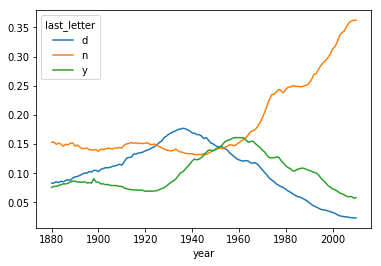

In [40]:
#trend over time 
dny_ts.plot()

<h2>Boy names that became girl names (and vice versa)</h2>

In [41]:
all_names = top1000.name.unique()

In [42]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [43]:
lesley_like = all_names[mask]

In [44]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

<p>filter down to just those names and sum births grouped by name
to see the relative frequencies:</p>

In [45]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [47]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    370568
Lesly      10072
Name: births, dtype: int64

<p>aggregate by sex and year and normalize within year:</p>

In [48]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [49]:
table = table.div(table.sum(1), axis=0)

In [50]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<p>make a plot of the breakdown by sex over time</p>

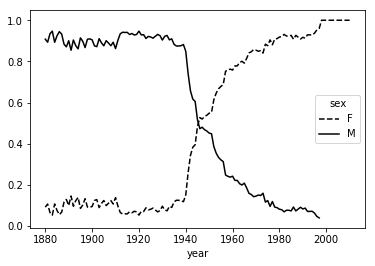

In [52]:
table.plot(style={'M': 'k-', 'F': 'k--'})